# Writing Assignment 2: The SIR Model

Sam Flores
Paul Allen
Differential Equations
November 7, 2019

## Introduction: What Is...?

The Susceptible-Infected-Removed, or SIR, Model is a way of understanding Epidemics that uses differential equations to yield the minimum amount of people that need to be vaccinated to prevent the disease from spreading to an uncontrollable amount of people. In this model we will take:

- $S(t)$ to be the percentage of the population who are susceptable to the disease
- $I(t)$ to be the percentage of the population who are infected by the disease
- $R(t)$ to be the percentage of population removed from both categories

Using this model, we can conveniently conclude that $S+I+R=1$, because each function represents a *percentage* of the population. We will assume that the percentage of people that are susceptible to the disease is proportional to the constant contact rate, $\beta$, and the percentage of people infected,$I$:

$$
\frac{dS}{dt}=-\beta IS
$$

Furthermore, we will assume that the rate at which people are infected will be proportional to $\beta$, the percentage of the population that are susceptible, and the percentage of the population that are infected. We will subract from this quantity the rate at which people recover,$\gamma$, from the infection which is compounded by $I$.

$$
\frac{dI}{dt}=\beta IS - \gamma I
$$

Together, these differential equations model the rate at which people are moved from the susceptible category to the infected category to the recovered category. These equations *model* this situation, and as such, it comes with some inaccuracy. Some characteristics of this situation that we do not include are:

- Disease is the only source of illness, meaning, it is the only thing that contributes to a person's ability to recover.
- There is no murder in this society, so no one from the diseased group is being moved to the removed group because of reasons other than recovery
- People don't die from this disease, which implies a change in population, remember this model relies on percentages of population. We can't have that population changing
- A constant interaction and recovery rates, $\beta$,$\gamma$
- This population doesn't reproduce.

There are many more factors that contribute to the innacuracy of this model, but essentially, we are thinking of an idealised society, so we ignore many chaotic factors. Even with this idealisation, these equations have proven to be incredibly useful.

## Equilibria

Just by looking at the equations, we can conclude the only equilibria that exist are those that follow:


$$(S,I)=(S_{*},0)$$ where, 

$S_{*}$ is some value between 0 and 1. We are restricting the value of $S$ to numbers between 0 and 1 because, again, $S$ is a *percentage* of the population.

For any value of $S$, we have equilibria where $I$ is equal to zero, because there is a factor of $I$ in every expression in the differential equations. Graphically we see:

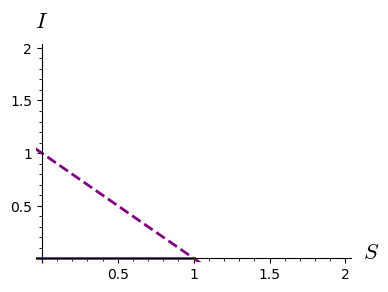

In [24]:
f(t) = (-1*t)+1
g(t) = 0
fplot = plot(f(t),(t,-1,2),ymin=-.5,ymax = 3, 
     thickness=2, 
     color='purple', 
     linestyle='dashed',
     figsize=[4,3])
gplot = plot(g(t),(t,-1,1),ymin=-.5,ymax = 3, 
     thickness=2, 
     color='red', 
     linestyle='solid',
     figsize=[4,3])

mainplot = fplot + gplot

mainplot.show(xmin = 0, xmax=2,
              ymin=0, ymax=2,
              axes_labels=['$S$','$I$'])

Where the red line represents those equilibria and the dashed purple line represents a bound where every $I$ and $S$ value add to $1$. Those are max inital values of $I$ and $S$. We have equilibria at every point along the $I=0$ line because at these points there are no infected people, and because there are no infected people the disease can't 'spread', so any percentage of the population can be susceptible, but there will be no change in the percentage infected, susceptible, or removed because in order for there to be any change in these equations, we require a non-zero amount of people to be infected.

### Linearization

The point $(S,I)=(1,0)$ is interesting because it brings us to the domain of pre-epidemic diseases, where 100% of the population is susceptible, but no one is infected yet. Investigating the stability of this point can give us insight into how dangerous particular diseases are based on their $\beta$ and $\gamma$ rates. To begin, we linearize the differential equations and find the following eigenvalues:

$$
\lambda = 0, \beta - \gamma
$$

Using these eigenvalues, we can determine the following eigenvectors:


$$
\bigg(
\begin{matrix}
1 \\
0
\end{matrix}
\bigg)
$$
and
$$
\bigg(
\begin{matrix}
\beta - \gamma \\
- \beta
\end{matrix}
\bigg)
$$

From here, we can play with the $\beta$ and $\gamma$ to gain a better intuition into how these factors matter. I will choose a few diffent values for these parameters and graph them using the linearized system of differenital equations around the point, $(S,I)=(1,0)$.

For values of $\beta$ and $\gamma$, $4$ and $1$, respectively, we attain the following behavior around equilibrium $(S,I)=(1,0)$,

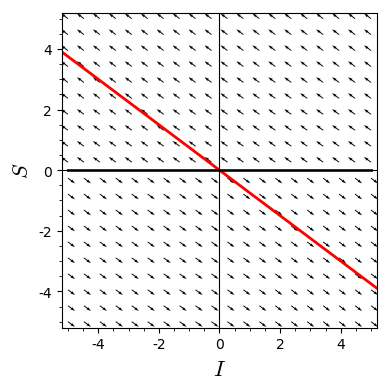

In [101]:
var('x,y,t,beta,gamma')
beta = 4
gamma = 1
Y = vector([x,y])
A = matrix([[0,(-1*beta)],[0,(beta-gamma)]])
Diag ,EV = A.eigenmatrix_right()
par1 = parametric_plot(t*EV.transpose()[0],(t,-10,10),thickness =2,
color='red')
par2 = parametric_plot(t*EV.transpose()[1],(t,-5,5),thickness =2, color=
'blue')
Field = A*Y/(A*Y).norm()
FieldPlot = plot_vector_field(Field ,(x,-5,5) ,(y,-5,5))
MainPlot = FieldPlot + par1 + par2
MainPlot.show(axes_labels =["$I$","$S$"],xmax=5,ymax=5,xmin=-5,ymin
=-5)


For this next diagram I chose values of $1$ and $2$ for $\beta$ and $\gamma$, respectively.

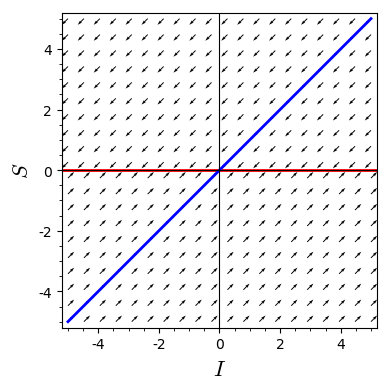

In [39]:
var('x,y,t,beta,gamma')
beta = 1
gamma = 2
Y = vector([x,y])
A = matrix([[0,(-1*beta)],[0,(beta-gamma)]])
Diag ,EV = A.eigenmatrix_right()
par1 = parametric_plot(t*EV.transpose()[0],(t,-10,10),thickness =2,
color='red')
par2 = parametric_plot(t*EV.transpose()[1],(t,-5,5),thickness =2, color=
'blue')
Field = A*Y/(A*Y).norm()
FieldPlot = plot_vector_field(Field ,(x,-5,5) ,(y,-5,5))
MainPlot = FieldPlot + par1 + par2
MainPlot.show(axes_labels =["$I$","$S$"],xmax=5,ymax=5,xmin=-5,ymin
=-5)

We can begin to formulate a theory surrounding $\beta$ and $\gamma$. We can see that when we set $\beta<\gamma$, the matrix produces a stable equilibrium. However, when we set $\beta>\gamma$, the matrix produces an unstable equilibrium. What happens when we set $\beta=\gamma$?

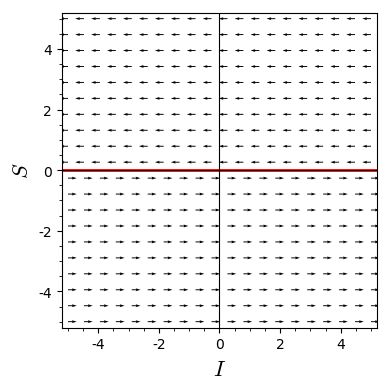

In [40]:
var('x,y,t,beta,gamma')
beta = 1
gamma = 1
Y = vector([x,y])
A = matrix([[0,(-1*beta)],[0,(beta-gamma)]])
Diag ,EV = A.eigenmatrix_right()
par1 = parametric_plot(t*EV.transpose()[0],(t,-10,10),thickness =2,
color='red')
par2 = parametric_plot(t*EV.transpose()[1],(t,-5,5),thickness =2, color=
'blue')
Field = A*Y/(A*Y).norm()
FieldPlot = plot_vector_field(Field ,(x,-5,5) ,(y,-5,5))
MainPlot = FieldPlot + par1 + par2
MainPlot.show(axes_labels =["$I$","$S$"],xmax=5,ymax=5,xmin=-5,ymin
=-5)

In this last instance, where $\gamma=\beta$, our field lines have no vertical motion, meaning that the population doesn't get better or worse as time goes on because infected-susceptible contact rate,$\beta$, is equal to the recovery rate,$\gamma$.

### Deductions

From the pictures above, we can deduce the following information about $\beta$ and $\gamma$, around the equilibrium point, $(S,I)=(1,0)$:
- if $\beta < \gamma$ then our equilibrium is stable
- if $\beta > \gamma$ then our equilibrium is a unstable
- if $\beta = \gamma$ then our equilibrium doesn't produce movement

In the first case, the population is recovering faster than the disease is infecting and so the point is stable. In the second case, the population is being infected faster than it is recovering, and so the point is unstable. In the last case, no movement is produced, so nothing is to be said about the point. We can therefore conclude that the stability of this point relies on the relationship between $\beta$ and $\gamma$. 

So, when it comes to assessing how dangerous a particular disease is, it comes down to an analysis of $\beta$ and $\gamma$. Specifically

$$
r_{o}=\frac{\beta}{\gamma}
$$

Where $r_{o}$, the *basic reproductive ratio*, is a unitless constant that can give us a reference for how dangerous a particular disease is. The larger $r_{o}$ the more dangerous, the lower, the less dangerous. Bearing in mind questions of stability and vulnerability we can conclude the following:

- if $r_{o}<1$ then our population **is not vulnerable**
- if $r_{o}>1$ then our population **is vulnerable**
- if $r_{o}=1$ then our population's **vulnerability is inconclusive**

We say that a population is vulnerable when $r_{o }$ is greater than $1$, because this is when $\beta$ is greater than $\gamma$, that is, the rate at which susceptible people are coming in contact with infected individuals is greater than the rate at which infected people are recovering,$\gamma$. 

### Justification for Area of Interest

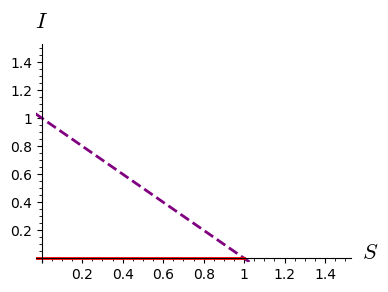

In [45]:
f(t) = (-1*t)+1
g(t) = 0
fplot = plot(f(t),(t,-1,2),ymin=-.5,ymax = 3, 
     thickness=2, 
     color='purple', 
     linestyle='dashed',
     figsize=[4,3])
gplot = plot(g(t),(t,-1,1),ymin=-.5,ymax = 3, 
     thickness=2, 
     color='red', 
     linestyle='solid',
     figsize=[4,3])

mainplot = fplot + gplot

mainplot.show(xmin = 0, xmax=1.5,
              ymin=0, ymax=1.5,
              axes_labels=['$S$','$I$'])

Why is it that we are only concerned about the region enclosed by these two lines in phase-space? We have defined this state-space using the following conditions:
- $S\geq0$
- $I\geq0$
- $S+I\leq1$ 

In order for us to really have any concern about disease, we assume a positive, non-zero percentage of the population is susceptible; otherwise there's no danger, and so, no reason to investigate from this lense.

As for the second condition, we assume that atleast *one* person is infected, because this is how epidemics start. Without one infected person, a disease can't spread.

The last condition comes from the fact that $S$ and $I$ represent *percentages* of a population, and so at any point in time, they mustn't be allowed to exceed $1$. Once susceptible people, $S$, get infected they, hopefully, begin to recover and eventually move from the infected group, $I$, to the removed group, $R$; remember our original model, $S+I+R=1$. Thus, $S+I\leq1$. 

### Completing the Diagram: Nullclines

In this section, we will begin to understand the larger diagram, by determining the nullclines of the system:

$$
\frac{dS}{dt}=-\beta IS
$$

$$
\frac{dI}{dt}=\beta IS - \gamma I
$$

From this point foward I will assume positive $\gamma$ and $\beta$ values. For vertical motion Nullclines, I solved $\frac{dS}{dt}=0$ and assessed vertical motion by plugging those solutions into $\frac{dI}{dt}$. This yielded the following results:

- Nullcline, $I=0$ has vertical motion dictated by $\frac{dI}{dt}=0$; no vertical motion
- Nullcline, $S=0$, has vertical motion dictated by $\frac{dI}{dt}=-\gamma I$; negative vertical motion for positive $I$

For horizontal motion Nullclines, I solved $\frac{dI}{dt}=0$ and assessed the horizontal motion by plugging those solution into $\frac{dS}{dt}$. This yielded the following results:

- Nullcline, $I=0$ has horizontal motion dictated by $\frac{dS}{dt}=0$; no horizontal motion
- Nullcline, $S=\frac{\gamma}{\beta}$, has horizontal motion dictated by $\frac{dI}{dt}=-\gamma I$; negative horizontal motion for positive $I$

These results can be shown in the following phase state diagram.

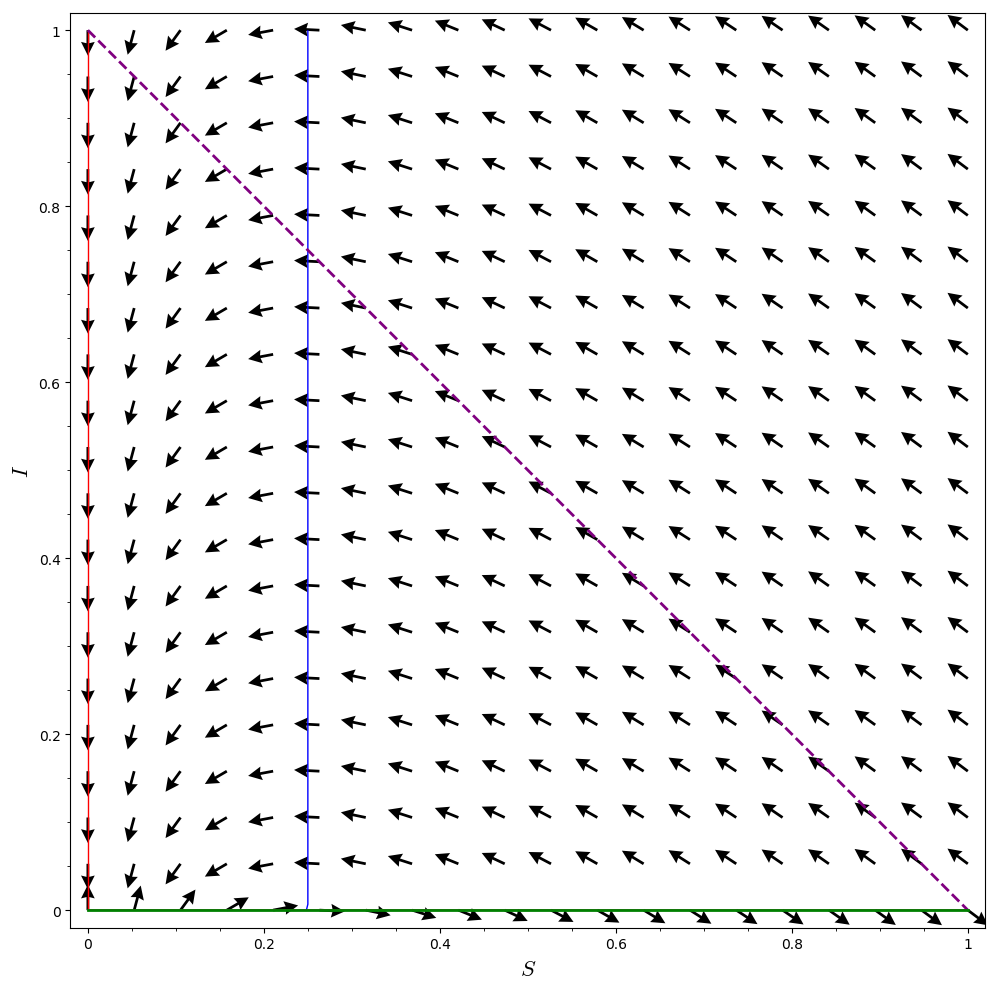

In [186]:
var('S','I','beta','gamma','x','y')
beta = 4
gamma = 1

f = -1*beta*I*S
g = (beta*I*S)-(gamma*I)

x(t) = (-1*t)+1
y(t) = 0
fplot = plot(x(t),(t,0,1),ymin=0,ymax = 1, 
     thickness=2, 
     color='purple', 
     linestyle='dashed')
gplot = plot(y(t),(t,0,1),ymin=0,ymax = 1, 
     thickness=2, 
     color='green', 
     linestyle='solid')

Vertical = implicit_plot(f,(S,-.0000001,1) ,
                         (I,-.000001,1),
                         linewidth =1,
                         color='red')
Horizontal = implicit_plot(g,(S,-.0000001,1) ,
                           (I,-.000001,1),
                           linewidth=1,
                           color='blue')

vectorField = vector ([f,g])
normalizedField = vectorField/vectorField.norm()
fieldplot = plot_vector_field(normalizedField ,
                              (S ,0,1) ,
                              (I ,-.000001,1),
axes_labels=['$S$','$I$'],
            headwidth = 5, 
            figsize=[10,10])


Mainplot  = fieldplot + Horizontal + Vertical + fplot + gplot
Mainplot.show(axes_labels=['$S$','$I$'])


In this plot, I graphed the linear barrier for which our initial conditions become unrealistic in purple-dash. The green line represents all of the equilibrium solutions that exist in this model, $(S,I)=(S_{*},0)$. The red and blue lines represent the horizontal and vertical nullclines, respectively, in this $S-I-R$ modeling of disease in a vulnerable population. For this example I set $\beta = 4$ and $\gamma=1$. We can see that the vertical nullcline appears at $S=0$ and the horizontal nullcline appears at $S=\frac{\gamma}{\beta}$. 

To facilitate a discussion of how $I$ moves with respect to these nullclines I will define the following regions:

- **Region I** is the triangle enclosed by the blue nullcline, green line of equilibrium solutions, and the purple dashed percent threshold.
- **Region II** is the right-trapezoid enclosed by the red nullcline, blue nullcline, green line of equilibrium solutions, and the purple dashed percent threshold.
- **Region III** and **Region IV** is bounded by the figure, the blue nullcline and the purple dashed percent-threshold. These regions exclusively include unrealistic inital conditions, as they do not follow $S+I+R=1$, which this whole discussion is founded upon.

We can see that Infection rises throughout **Region I** and falls once it passes through the blue nullcline into **Region II**.

## Vaccination

### Calculating $p_{o}$

"Suppose we are in a situation where a population is vulnerable, due to the value of $r_{o}$ for that disease. We are interested in preventing an epidemic by using vaccines. In practice, it is not possible to vaccinate 100% of the population. Let $p_{o}$ be the percent of
the population that is vaccinated. In order to learn whether the vaccination rate is high enough, we analyze the stability of the equilibrium at $(S,I) = (1-p_{o}, 0)$...."(Allen 2.14) 

We analyze this equilibrium to understand how many people we need to vaccinate in order to avoid an epidemic, that is, what is the minimum $p_{o}$ that gives us an equilibrium point, $(S,I) = (1-p_{o}, 0)$, which is stable.

Let's say a population is vulnerable to a particular disease, or $r_{o} = \frac{\beta}{\gamma}>1$. And, let's assume we are looking for a point $(S,I) = (1-p_{o}, 0)$ such that on one side of that point there exist unstable equilibria, and on the other, stable equilibria. Our task is to find at what $p_{o}$ that point exists. 

We can solve for the eigenvalues with the same method we used for the point $(S,I) = (1, 0)$ earlier in this paper. Setting $S=(1-p_{o})$ and $I=0$ and linearizing,

$$
\frac{dS}{dt}=-\beta IS
$$

$$
\frac{dI}{dt}=\beta IS-\gamma I,
$$

I calculate the following eigenvalues using the eigenvalue equation,

$$
\lambda=0
$$
$$
\lambda = \beta-\beta p_{o}-\gamma
$$

$\lambda=0$ doesn't tell me anything about stability, and so, I will leave it out of this discussion. Now, my task is to figure out at what $p_{o}$ does the remaining $\lambda$ become negative, and therefore, become stable; as opposed to a positive $\lambda$ which indicates instability. Simply, I set 

$$
\beta-\beta p_{o}-\gamma = 0,
$$

and solve for $p_{o}$,

$$
p_{o} = 1-\frac{\gamma}{\beta}
$$

In terms of $r_{o}$, we can rewrite this minimum-percent-vaccinate threshold as,

$$
p_{o} = 1-\frac{1}{r_{o}}
$$

### Putting the Model to Use

Measles had an $r_{o}$ of about $12$. To understand how many people would have needed to be vaccinated before the disease became an epidemic, we need to, first, calculate the threshold at which it *becomes* an epidemic. Using,

$$
p_{o} = 1-\frac{1}{r_{o}}
$$

We can calculate the minimum percentage of the population for which we need to vaccinate to prevent an epidemic. This turns out to be about $91.7$%. For Small pox($r_{o}=4$), we calculate a value of $75$%. This is to say, that in order to prevent an epidemic of Measles and Small Pox, we must vaccinate at minimum, $91.7$% and $75$% of a population, respectively, against these diseases.